In [1]:
%pylab
%matplotlib inline
%load_ext watermark
%watermark -v -m -p scipy,sklearn,numpy

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib
CPython 2.7.12
IPython 5.1.0

scipy 0.18.1
sklearn 0.18.1
numpy 1.12.0

compiler   : GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)
system     : Darwin
release    : 16.4.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


Using TensorFlow backend.


Untaring file...
(50000, 32, 32, 3) (50000, 1)


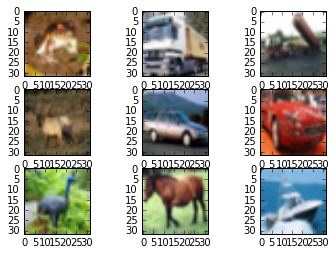

In [2]:
# plot ad hoc CIFAR10 instances
from keras.datasets import cifar10
from matplotlib import pyplot
from scipy.misc import toimage

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print X_train.shape, y_train.shape

# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(toimage(X_train[i]))

# show the plot
pyplot.show()

In [3]:
# simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
# create the model
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), border_mode='same', activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same', W_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 32, 32, 32)    896         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 32, 32, 32)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 32, 32, 32)    9248        dropout_1[0][0]                  
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 16, 16, 32)    0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [8]:
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=epochs, batch_size=32)

# final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 182s - loss: 1.7570 - acc: 0.3630 - val_loss: 1.3953 - val_acc: 0.4964
Epoch 2/25
50000/50000 [==============================] - 176s - loss: 1.3484 - acc: 0.5161 - val_loss: 1.2394 - val_acc: 0.5573
Epoch 3/25
50000/50000 [==============================] - 176s - loss: 1.1791 - acc: 0.5788 - val_loss: 1.0948 - val_acc: 0.6052
Epoch 4/25
50000/50000 [==============================] - 177s - loss: 1.0672 - acc: 0.6212 - val_loss: 1.0442 - val_acc: 0.6288
Epoch 5/25
50000/50000 [==============================] - 678s - loss: 0.9754 - acc: 0.6536 - val_loss: 0.9928 - val_acc: 0.6496
Epoch 6/25
50000/50000 [==============================] - 178s - loss: 0.8984 - acc: 0.6828 - val_loss: 0.9697 - val_acc: 0.6578
Epoch 7/25
50000/50000 [==============================] - 179s - loss: 0.8305 - acc: 0.7050 - val_loss: 0.9479 - val_acc: 0.6661
Epoch 8/25
50000/50000 [=======================

In [10]:
# create the model
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), activation='relu', border_mode='same'))
model.add(Dropout(0.2))
model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
model.add(Dropout(0.2))
model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
model.add(Dropout(0.2))
model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
# compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_7 (Convolution2D)  (None, 32, 32, 32)    896         convolution2d_input_3[0][0]      
____________________________________________________________________________________________________
dropout_5 (Dropout)              (None, 32, 32, 32)    0           convolution2d_7[0][0]            
____________________________________________________________________________________________________
convolution2d_8 (Convolution2D)  (None, 32, 32, 32)    9248        dropout_5[0][0]                  
____________________________________________________________________________________________________
maxpooling2d_4 (MaxPooling2D)    (None, 16, 16, 32)    0           convolution2d_8[0][0]            
___________________________________________________________________________________________

In [11]:
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=epochs, batch_size=64)

# final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 322s - loss: 1.9131 - acc: 0.2945 - val_loss: 1.7661 - val_acc: 0.3717
Epoch 2/25
50000/50000 [==============================] - 321s - loss: 1.5021 - acc: 0.4533 - val_loss: 1.3432 - val_acc: 0.5161
Epoch 3/25
50000/50000 [==============================] - 322s - loss: 1.3238 - acc: 0.5205 - val_loss: 1.2389 - val_acc: 0.5603
Epoch 4/25
50000/50000 [==============================] - 321s - loss: 1.1958 - acc: 0.5685 - val_loss: 1.1470 - val_acc: 0.5889
Epoch 5/25
50000/50000 [==============================] - 319s - loss: 1.0932 - acc: 0.6087 - val_loss: 1.0013 - val_acc: 0.6452
Epoch 6/25
50000/50000 [==============================] - 320s - loss: 1.0040 - acc: 0.6409 - val_loss: 0.9864 - val_acc: 0.6485
Epoch 7/25
50000/50000 [==============================] - 320s - loss: 0.9300 - acc: 0.6684 - val_loss: 0.8960 - val_acc: 0.6865
Epoch 8/25
50000/50000 [=======================